# Machine Learning Specialization - Regression

Course Activities Notebook.

## One-Dimensional Linear Regression

For implementations in this notebook, we use the follow modules and data:

Text(0, 0.5, 'Y')

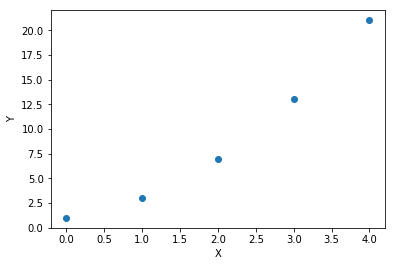

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

X = np.array([0, 1, 2, 3, 4])
Y = np.array([1, 3, 7, 13, 21])
N = len(X)

plt.scatter(X, Y)
plt.xlabel('X')
plt.ylabel('Y')

### Loss Function RSS

The follow function is *Residual Sum of Squares* (RSS) loss function.
$$ g(w) = min \left[ \sum_{i=1}^{N} y_i - \left( w_0 + w_1 \times x_i \right) \right]^2 $$

Calculating the derivative of $g(w)$ in relation with $w$ we have
    $$ \frac{\partial g}{\partial w_0} = -2 \sum_{i=0}^{N} \left[y_1 - \left(w_0 + w_1 x_i \right) \right] $$
And
    $$ \frac{\partial g}{\partial w_1} = -2 \sum_{i=0}^{N} \left[y_1 - \left(w_0 + w_1 x_i \right) \right] x_i $$


### First Approach: Exact Soluction (set gradient equals to zero)
    
We get
    $$ \hat{w_0} = \frac{\sum_{i=1}^{N} y_i}{N} - \frac{\hat{w_1} \sum_{i=1}^{N} x_i}{N} $$
And
    $$ \hat{w_1} = \frac{\sum_{i=1}^{N} y_i x_i - \sum_{i=1}^{N} y_i \sum_{i=1}^{N} x_i}{\sum_{i=1}^{N}x_i^2 - \frac{\sum_{i=1}^{N}x_i \sum_{i=1}^{N}x_i}{N}} $$
    

**Implementation:**

Slope: 5.00 | Intercept: -1.00


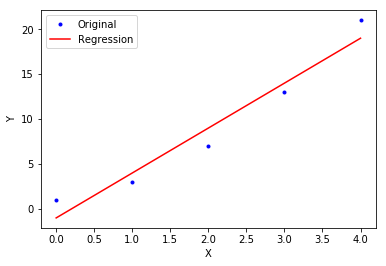

In [2]:
numerator = np.sum(X*Y) - (1/N)*(np.sum(X) * np.sum(Y))
denominator = np.sum(X**2) - (1/N)*(np.sum(X) * np.sum(X))

slope = numerator / denominator
intercept = np.mean(Y) - slope * np.mean(X)

print("Slope: {0:2.2f} | Intercept: {1:2.2f}".format(slope, intercept))

predictions = intercept + slope * X

plt.plot(X, Y, '.', color='blue', label='Original')
plt.plot(X, predictions, '-', color='red', label='Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

### Second Approach - Gradient Descent Algorithm


---

**While** (not converge):
    $$w^{(t+1)} \leftarrow w^{(t)} - \eta \frac{\partial g}{\partial w}$$

---


#### Implementation
**Details:**
- Inicial Intercept equals to 0.0;
- Inicial Slope equals to 0.0;
- Step Size ($\eta$) equals to 0.05;
- Tolerance ($\epsilon$) equals to 0.01

| Step: 1 | Intercept = 2.2500 | Slope = 7.0000 | Loss: 99.349446 |
| Step: 2 | Intercept = 0.4375 | Slope = 2.3750 | Loss: 67.138063 |
| Step: 3 | Intercept = 1.3906 | Slope = 5.5938 | Loss: 45.393045 |
| Step: 4 | Intercept = 0.4961 | Slope = 3.5078 | Loss: 30.719602 |
| Step: 5 | Intercept = 0.8682 | Slope = 4.9980 | Loss: 20.825569 |
| Step: 6 | Intercept = 0.4021 | Slope = 4.0669 | Loss: 14.163561 |
| Step: 7 | Intercept = 0.5181 | Slope = 4.7655 | Loss: 9.689181 |
| Step: 8 | Intercept = 0.2558 | Slope = 4.3582 | Loss: 6.697456 |
| Step: 9 | Intercept = 0.2628 | Slope = 4.6930 | Loss: 4.711838 |
| Step: 10 | Intercept = 0.1006 | Slope = 4.5221 | Loss: 3.408448 |
| Step: 11 | Intercept = 0.0644 | Slope = 4.6886 | Loss: 2.564286 |
| Step: 12 | Intercept = -0.0460 | Slope = 4.6235 | Loss: 2.022952 |
| Step: 13 | Intercept = -0.0963 | Slope = 4.7113 | Loss: 1.674100 |
| Step: 14 | Intercept = -0.1778 | Slope = 4.6925 | Loss: 1.442171 |
| Step: 15 | Intercept = -0.2296 | Slope = 4.742

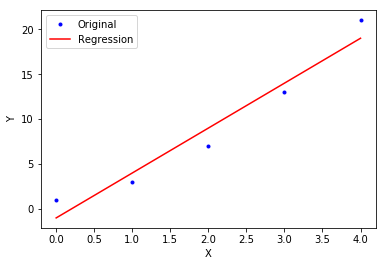

In [3]:
intercept = 0
slope = 0
step_size = 0.05
tolerance = 0.01

step_counter = 0

predictions = intercept + slope * X
errors = predictions - Y

magnetude = np.sqrt(np.sum(errors**2))

while magnetude > tolerance:
    step_counter += 1
    intercept = intercept - step_size * np.sum(errors)

    slope = slope - step_size * np.sum(errors * X)

    predictions = intercept + slope * X
    errors = predictions - Y
    magnetude = np.sqrt(np.sum(errors)**2 + np.sum(errors * X)**2)

    print(
        "| Step: {0:d} | Intercept = {1:2.4f} | Slope = {2:2.4f} | Loss: {3:2.6f} |".format(
            step_counter,
            intercept,
            slope,
            magnetude
        )
    )

plt.plot(X, Y, '.', color='blue', label='Original')
plt.plot(X, predictions, '-', color='red', label='Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
